In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.ml.feature import VectorAssembler 
from pyspark.ml.regression import LinearRegression

In [29]:
data = pd.read_csv("real_estate.csv")
data

,Age,Stores,Price
0,32.0,10,37.9
1,34.5,7,40.3
2,20.3,6,46.7
3,31.7,1,18.8
4,34.8,1,41.4
...,...,...,...
132,21.2,4,42.5
133,37.1,1,31.9
134,26.8,5,35.5
135,30.9,9,39.7


In [3]:
df = spark.createDataFrame(df)
df.show()

+----+------+-----+
| Age|Stores|Price|
+----+------+-----+
|32.0|    10| 37.9|
|34.5|     7| 40.3|
|20.3|     6| 46.7|
|31.7|     1| 18.8|
|34.8|     1| 41.4|
|20.4|     4| 23.8|
|35.7|     2| 50.5|
|39.6|     4| 38.8|
|29.3|     2| 27.0|
|25.9|     0| 22.1|
|29.6|     7| 25.0|
|37.9|     1| 34.2|
|36.1|     5| 34.7|
|34.4|     6| 34.1|
|36.6|     8| 38.3|
|21.7|     9| 42.0|
|35.9|     3| 61.5|
|24.2|     0| 13.4|
|29.4|     1| 13.2|
|21.7|     4| 44.2|
+----+------+-----+
only showing top 20 rows



In [4]:
df = VectorAssembler(inputCols=["Age"],outputCol = "feature1").transform(df)

In [5]:
df.show()

+----+------+-----+--------+
| Age|Stores|Price|feature1|
+----+------+-----+--------+
|32.0|    10| 37.9|  [32.0]|
|34.5|     7| 40.3|  [34.5]|
|20.3|     6| 46.7|  [20.3]|
|31.7|     1| 18.8|  [31.7]|
|34.8|     1| 41.4|  [34.8]|
|20.4|     4| 23.8|  [20.4]|
|35.7|     2| 50.5|  [35.7]|
|39.6|     4| 38.8|  [39.6]|
|29.3|     2| 27.0|  [29.3]|
|25.9|     0| 22.1|  [25.9]|
|29.6|     7| 25.0|  [29.6]|
|37.9|     1| 34.2|  [37.9]|
|36.1|     5| 34.7|  [36.1]|
|34.4|     6| 34.1|  [34.4]|
|36.6|     8| 38.3|  [36.6]|
|21.7|     9| 42.0|  [21.7]|
|35.9|     3| 61.5|  [35.9]|
|24.2|     0| 13.4|  [24.2]|
|29.4|     1| 13.2|  [29.4]|
|21.7|     4| 44.2|  [21.7]|
+----+------+-----+--------+
only showing top 20 rows



In [6]:
model = LinearRegression(featuresCol = "feature1",labelCol = "Price").fit(df)

In [7]:
model.coefficients

DenseVector([0.7789])

In [8]:
model.intercept

11.09675060457198

In [11]:
model.summary.rootMeanSquaredError

11.606676815627182

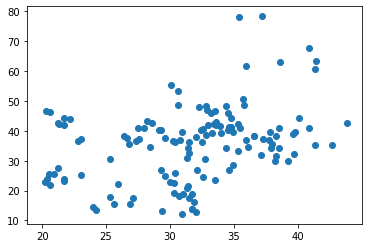

In [37]:
x = np.linspace(20,30,1)
y = np.linspace(0,70,100)
plt.plot(x,0.7789*x+11.09675060457198,color="red")
plt.scatter(data["Age"],data["Price"])
plt.show()

In [12]:
df1 = VectorAssembler(inputCols=["Age","Stores"],outputCol = "feature2").transform(df)

In [13]:
df1.show()

+----+------+-----+--------+-----------+
| Age|Stores|Price|feature1|   feature2|
+----+------+-----+--------+-----------+
|32.0|    10| 37.9|  [32.0]|[32.0,10.0]|
|34.5|     7| 40.3|  [34.5]| [34.5,7.0]|
|20.3|     6| 46.7|  [20.3]| [20.3,6.0]|
|31.7|     1| 18.8|  [31.7]| [31.7,1.0]|
|34.8|     1| 41.4|  [34.8]| [34.8,1.0]|
|20.4|     4| 23.8|  [20.4]| [20.4,4.0]|
|35.7|     2| 50.5|  [35.7]| [35.7,2.0]|
|39.6|     4| 38.8|  [39.6]| [39.6,4.0]|
|29.3|     2| 27.0|  [29.3]| [29.3,2.0]|
|25.9|     0| 22.1|  [25.9]| [25.9,0.0]|
|29.6|     7| 25.0|  [29.6]| [29.6,7.0]|
|37.9|     1| 34.2|  [37.9]| [37.9,1.0]|
|36.1|     5| 34.7|  [36.1]| [36.1,5.0]|
|34.4|     6| 34.1|  [34.4]| [34.4,6.0]|
|36.6|     8| 38.3|  [36.6]| [36.6,8.0]|
|21.7|     9| 42.0|  [21.7]| [21.7,9.0]|
|35.9|     3| 61.5|  [35.9]| [35.9,3.0]|
|24.2|     0| 13.4|  [24.2]| [24.2,0.0]|
|29.4|     1| 13.2|  [29.4]| [29.4,1.0]|
|21.7|     4| 44.2|  [21.7]| [21.7,4.0]|
+----+------+-----+--------+-----------+
only showing top

In [15]:
model = LinearRegression(featuresCol = "feature2",labelCol = "Price").fit(df1)

In [16]:
model.coefficients

DenseVector([0.5277, 2.2254])

In [17]:
model.intercept

8.856805380062555

In [18]:
model.summary.rootMeanSquaredError

9.389195227388173